## Part One 2D Convolution

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class Conv2d():
    def __init__(self, path):
        self.img = cv2.imread(path, 0)
        self.img_size = np.shape(self.img)
        
class Conv2d(Conv2d):
    def Conv(self, k_size, kernel):
        "do convolution for img using kernel"
        img = self.img
        img_size = self.img_size
        x_offset = k_size[0] // 2
        y_offset = k_size[1] // 2
        ystart, xstart = y_offset, x_offset
        xend = img_size[0] - x_offset - 1
        yend = img_size[1] - y_offset - 1
        res = np.zeros((xend - xstart + 1, yend - ystart + 1))  # result
                              
        for x in range(xstart, xend + 1):
            for y in range(ystart, yend + 1):
                # do one convolution in one loop, [x,y] is the center position of the kernel
                for i in range(k_size[0]):
                    for j in range(k_size[1]):
                        res[x - x_offset][y - y_offset] += img[x - x_offset + i][y - y_offset + j] * kernel[i][j]

        return res# / (k_size[0] * k_size[1])

In [16]:
class Conv2d(Conv2d):
    def Gaussian(self, kernel_size=3, sigma=1.0):
        "Gaussian convolution"
        kernel = np.zeros((kernel_size, kernel_size))
        center = kernel_size // 2

        for x in range(kernel_size):
            for y in range(kernel_size):
                kernel[x][y] = np.exp(-((x - center) ** 2 + (y - center) ** 2) / (2 * sigma ** 2))
        kernel /= (2 * 3.14 * sigma ** 2)
        return self.Conv([kernel_size, kernel_size], kernel)

In [3]:
class Conv2d(Conv2d):
    def Sobel(self):
        "Sobel convolution"
        horz_k = [[1, 0, -1], [2, 0, -2], [1, 0, -1]]  # horizontal kernel
        vert_k = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]  # vertical kernel
        h = self.Conv([3, 3], horz_k)
        v = self.Conv([3, 3], vert_k)
        c_shape = np.shape(h)
        combined = np.zeros(c_shape)

        for i in range(c_shape[0]):
            for j in range(c_shape[1]):
                combined[i][j] = (h[i][j]**2+v[i][j]**2)**0.5
                
        return h, v, combined

In [4]:
class Conv2d(Conv2d):
    def Haar(self, scale):
        k = []
        for i in range(2*scale):
            k.append([])   # 2*1
        for i in range(2*scale):
            if i < scale:
                for j in range(scale):
                    k[i].append(1)
            else:
                for j in range(scale):
                    k[i].append(-1)
        t1x = self.Conv([2*scale, scale], k)
        k = []
        for i in range(scale):
            k.append([]) # 1*2
        for i in range(scale):
            for j in range(scale*2):
                if j < scale:
                    k[i].append(1)
                else:
                    k[i].append(-1)
        t1y = self.Conv([scale, 2*scale], k)
        k = []
        for i in range(3*scale):
            k.append([])   # 3*1
        for i in range(3*scale):
            if i < scale:
                for j in range(scale):
                    k[i].append(1)
            elif i < 2*scale:
                for j in range(scale):
                    k[i].append(-1)
            else:
                for j in range(scale):
                    k[i].append(1)
        t2x = self.Conv([3*scale, scale], k)
        k = []
        for i in range(scale):
            k.append([])   # 1*3
        for i in range(scale):
            for j in range(scale*3):
                if j < scale:
                    k[i].append(1)
                elif j < 2*scale:
                    k[i].append(-1)
                else:
                    k[i].append(1)
        t2y = self.Conv([scale, 3*scale], k)
        k = []
        for i in range(2*scale):
            k.append([])  # 2*2
        for i in range(2*scale):
            for j in range(2*scale):
                if i < scale:
                    if j < scale:
                        k[i].append(-1)
                    else:
                        k[i].append(1)
                else:
                    if j < scale:
                        k[i].append(1)
                    else:
                        k[i].append(-1)
        t3 = self.Conv([2*scale, 2*scale], k)
        
        return [t1x, t1y, t2x, t2y, t3]

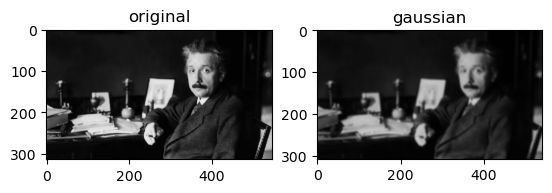

In [17]:
if __name__ == "__main__":
    path = "einstein.png"
    img = Conv2d(path)
    original = cv2.imread(path, 0)
    gaussian = img.Gaussian(7, 2)

    # showing original, gaussian
    f1, axis = plt.subplots(1,2)
    axis[0].imshow(original, cmap='gray', vmin=0, vmax=255)
    axis[0].set_title("original")

    axis[1].imshow(gaussian, cmap='gray', vmin=0, vmax=255)
    axis[1].set_title("gaussian")

Text(0.5, 1.0, 'sobel combined')

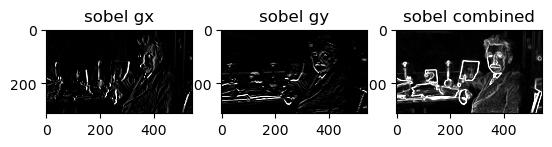

In [6]:
    # sobel*3
if __name__ == "__main__":
    sobel = img.Sobel()
    f2, axis = plt.subplots(1,3)

    axis[0].imshow(sobel[0], cmap='gray', vmin=0, vmax=255)
    axis[0].set_title("sobel gx")

    axis[1].imshow(sobel[1], cmap='gray', vmin=0, vmax=255)
    axis[1].set_title("sobel gy")

    axis[2].imshow(sobel[2], cmap='gray', vmin=0, vmax=255)
    axis[2].set_title("sobel combined")

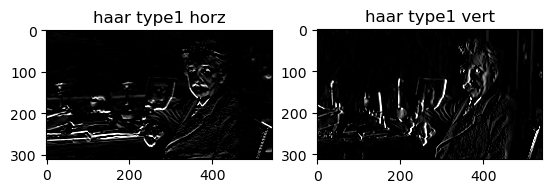

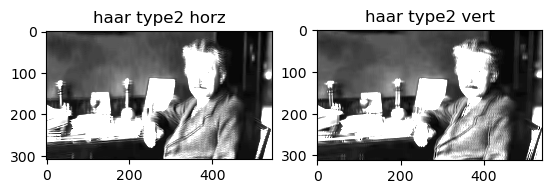

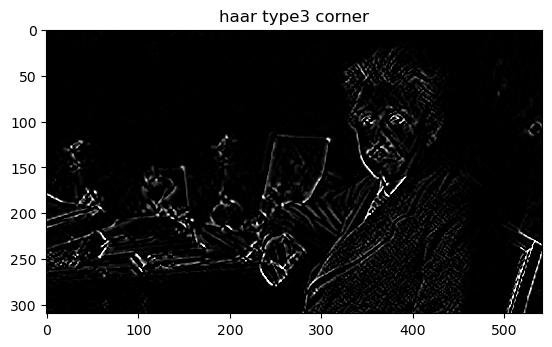

In [7]:
    # original, haar like*5
if __name__ == "__main__":
    haar = img.Haar(scale=2)
    f3, axis = plt.subplots(1, 2)
    axis[0].imshow(haar[0], cmap='gray', vmin=0, vmax=255)
    axis[0].set_title("haar type1 horz")

    axis[1].imshow(haar[1], cmap='gray', vmin=0, vmax=255)
    axis[1].set_title("haar type1 vert")
    
    f4, axis = plt.subplots(1, 2)
    axis[0].imshow(haar[2], cmap='gray', vmin=0, vmax=255)
    axis[0].set_title("haar type2 horz")

    axis[1].imshow(haar[3], cmap='gray', vmin=0, vmax=255)
    axis[1].set_title("haar type2 vert")
    
    f5, axis = plt.subplots(1,1)
    axis.imshow(haar[4], cmap='gray', vmin=0, vmax=255)
    axis.set_title("haar type3 corner")
    plt.show()


### Part 1 Conclusions

The outputs given above includes convolution results for the same image of Einstein with Gaussian kernel, Sobel kernel and Haar like features respectively.
- The Gaussian Kernel results in blurring the image. Larger scale of the kernel makes the result blurer (with fixed sigma).
- The Sobel Kernel could detect edges on horizontal or vertical directions (see sobel gx and sobel gy respectively).
- The Haar like masks have three types, for derevatives, edges and corners. Different scales of masks could help detect different scales of human face features (corresponding to different sacles of faces).